<IPython.core.display.Javascript object>


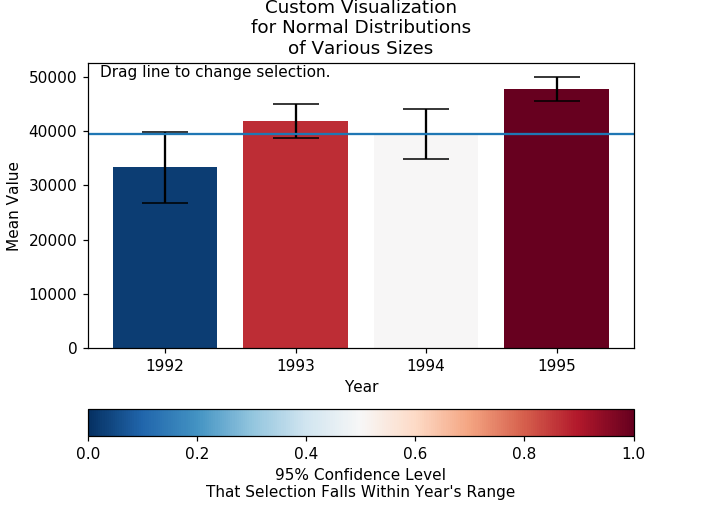

In [1]:
# Marc Garard
# 11/23/2018
# interactive graph based on Ferreira, Fisher, & Konig
# http://dx.doi.org/10.1145/2556288.2557131
# Here I recreate two of the conceptual user interactive charting in the above reference 

%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

class BarChart( ):
    hline1 = None
    lineToDrag = None
    def __init__(self, data):
        self.data = data
        self.annotation = [ list( i ) for i in zip( self.data.index.values-0.15, [ 15000, 15000, 15000, 15000 ] ) ]
        self.anno = [0]*len(self.data)
        # determine: mean, std, and margin of error
        self.mean = self.data.mean(axis = 1)
        self.sem = stats.sem(df, axis = 1)
        self.h = self.sem * stats.t.ppf((1-0.95) / 2, len(df.iloc[0]-1))
        # prepare the chart and color bar
        self.fig, self.ax = plt.subplots(1,1)
        self.cmap = cm.RdBu_r
        norm = cm.colors.Normalize(vmin=0, vmax=1)
        sm = plt.cm.ScalarMappable(cmap  = self.cmap, norm = norm)
        sm.set_array([])
        self.fig.colorbar(sm, orientation = 'horizontal', label = "95% Confidence Level\nThat Selection Falls Within Year's Range")
        self.barChart( [self.mean.iloc[0]] )
        self.hline1 = plt.axhline(y=self.mean.iloc[0])
        self.connect()
        return
    
    # draws and labels the bar chart and hline
    def barChart( self, y=50000 ):
        # clear chart and redraw, label and annotate
        self.ax.cla()
        colorScale = self.getColorScale( y )
        self.bars = plt.bar( self.data.index, self.mean, yerr = self.h, color = self.cmap(colorScale), capsize = 15 )
        self.hline1 = plt.axhline(y=y)
        self.ax.set_xticks(np.array([1992, 1993, 1994, 1995]))
        self.ax.set_ylabel('Mean Value')
        self.ax.set_xlabel('Year')
        plt.gca().set_title('Custom Visualization\nfor Normal Distributions\nof Various Sizes')
        self.ax.annotate("Drag line to change selection.", [1991.5, 50000])
        return

    # check for lines selected
    # select line after check for unlocked ( onPress ) lines
    def onPress( self, event ):
        if self.lineToDrag is not None: return
        contains, attrd = self.hline1.contains(event)
        if not contains: return
        self.lineToDrag = self.hline1
        return
    
    # drag the line
    def onDrag( self, event ):
        if self.lineToDrag is None: return
        self.hline1.set_ydata(event.ydata)
        self.hline1.figure.canvas.draw()
        pause(0.01)
        return
    
    # draw line in final drop location after drag
    def onRelease( self, event ):
        if self.lineToDrag is None: return
        colorScale = self.getColorScale( event.ydata )
        for idx, bar in enumerate(self.bars):
            bar.set_color(self.cmap(colorScale)[idx])
        # signal dragging is done
        self.lineToDrag = None
        return
    
    # determine the color scale for 0 to 1 : blue to red : 0% in range to 100% in range
    def getColorScale( self, y ):
        colors = list(  ( (y-self.mean+self.h) / self.h / 2 ) )
        return [  min(max(i, 0), 0.999 ) for i in colors ]
    
    # connect the hline to drag
    def connect( self ):
        self.hline1.figure.canvas.mpl_connect('button_press_event', self.onPress)
        self.hline1.figure.canvas.mpl_connect('motion_notify_event', self.onDrag)
        self.hline1.figure.canvas.mpl_connect('button_release_event', self.onRelease)
        return

bc = BarChart(df)
bc.barChart([bc.mean.iloc[2]])

<IPython.core.display.Javascript object>


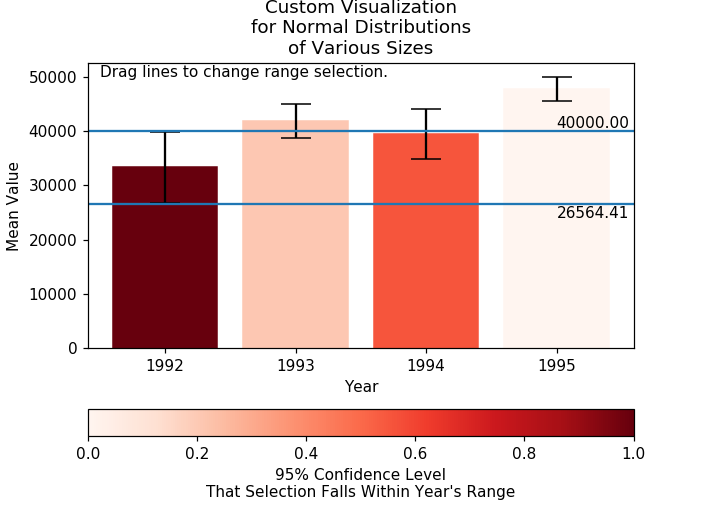

In [2]:
# Marc Garard
# 11/23/2018
# interactive graph based on Ferreira, Fisher, & Konig
# http://dx.doi.org/10.1145/2556288.2557131

%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats
np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

class BarChart( ):
    hline1 = None
    hline2 = None
    lineToDrag = None
    y1, y2 = 40000, 35000
    def __init__(self, data):
        self.data = data
        self.annotation = [ list( i ) for i in zip( self.data.index.values-0.15, [ 15000, 15000, 15000, 15000 ] ) ]
        self.anno = [0]*len(self.data)
        # determine: mean, std, and margin of error
        self.mean = self.data.mean(axis = 1)
        self.sem = stats.sem(df, axis = 1)
        self.h = self.sem * stats.t.ppf((1-0.95) / 2, len(df.iloc[0]-1))
        # prepare the chart and color bar
        self.fig, self.ax = plt.subplots(1,1)
        self.cmap = cm.Reds
        norm = cm.colors.Normalize(vmin=0, vmax=1)
        sm = plt.cm.ScalarMappable(cmap  = self.cmap, norm = norm)
        sm.set_array([])
        self.fig.colorbar(sm, orientation = 'horizontal', label = "95% Confidence Level\nThat Selection Falls Within Year's Range")
        self.barChart( )
        if self.hline1 is None: self.hline1 = plt.axhline(y=float( self.y1 ) )
        if self.hline2 is None: self.hline2 = plt.axhline(y=float( self.y2 ) )
        self.connect()
        return
    
    # close connections destroy object
    def __del__( self ):
        self.disconnect()
        return
    
    # draws and labels the bar chart and hline
    def barChart( self ):
        # clear chart and redraw, label and annotate
        self.ax.cla()
        
        colorScale = self.getColorScale( self.y1, self.y2 )
        self.bars = plt.bar( self.data.index, self.mean, yerr = self.h, color = self.cmap(colorScale), capsize = 10 )
        self.hline1 = plt.axhline( self.y1 )
        self.hline2 = plt.axhline( self.y2 )
        # fixes buggy code: converts get_(x,y)data() from list to float
        self.hline1.set_ydata(self.y1)
        self.hline2.set_ydata(self.y2)
        self.ax.set_xticks(np.array([1992, 1993, 1994, 1995]))
        self.ax.set_ylabel('Mean Value')
        self.ax.set_xlabel('Year')
        plt.gca().set_title('Custom Visualization\nfor Normal Distributions\nof Various Sizes')
        self.ax.annotate("Drag lines to change range selection.", [1991.5, 50000])
        self.anno1 = self.ax.annotate( '{:.2f}'.format( self.y1 ), [ 1995, (self.y1 + 500.) ] )
        self.anno2 = self.ax.annotate( '{:.2f}'.format( self.y2 ), [ 1995, (self.y2 - 2500.) ] )
        return

    # check for lines selected
    # select line after check for unlocked ( onPress ) lines
    def onPress( self, event ):
        if self.lineToDrag is not None: return
        contains, attrd = self.hline1.contains(event)
        if contains: self.lineToDrag = self.hline1
        else:
            contains, attrd = self.hline2.contains(event)
            if contains: self.lineToDrag = self.hline2
        return
    
    # drag the line and draw on notice
    def onDrag( self, event ):
        if self.lineToDrag is None: return
        self.lineToDrag.set_ydata(event.ydata)
        self.lineToDrag.figure.canvas.draw()
        pause(0.01)
        return
    
    # draw line in final drop location after drag
    def onRelease( self, event ):
        if self.lineToDrag is None: return
        # signal dragging is done
        line = self.lineToDrag
        self.lineToDrag = None
        self.updateAll( event )
        line.set_ydata(event.ydata)
        line.figure.canvas.draw()
        return
    
    def updateAll( self, event ):
        colorScale = self.getColorScale( self.hline1.get_ydata(), self.hline2.get_ydata() )
        for idx, bar in enumerate(self.bars):
            bar.set_color(self.cmap(colorScale)[idx])
        self.y1, self.y2 = self.hline1.get_ydata(), self.hline2.get_ydata()
        # adjust labeling if lines switched and annoate y selection
        yscale1, yscale2 = 500, -2500
        if self.y1 < self.y2: yscale1, yscale2 = -2500, 500
        self.anno1.remove()
        self.anno2.remove()
        self.anno1 = self.ax.annotate( '{:.2f}'.format( self.y1 ), [ 1995, self.hline1.get_ydata() + yscale1 ] )
        self.anno2 = self.ax.annotate( '{:.2f}'.format( self.y2 ), [ 1995, self.hline2.get_ydata() + yscale2 ] )
        return
    
    # determine the color scale for 0 to 1 : white to red : 0% in range to 100% in range
    def getColorScale( self, one, two ):
        # determine which line is max and min
        maxn, minn = max(one, two), min(one, two)
        # calcuate how much of 95% distribution is in range of each line
        # for both max & min: x > 1 := 1, x < 0 := 0
        # note that h was calculated as negative values
        diffmax = ( maxn - ( self.mean - np.abs(self.h) ) ) / ( np.abs(self.h) * 2 )
        diffmin = ( ( self.mean + np.abs(self.h) - minn ) / ( np.abs(self.h) * 2 ) )
        diffmax[diffmax > 1], diffmin[diffmin > 1] = 1, 1
        diffmax[diffmax < 0], diffmin[diffmin < 0] = 0, 0
        return ( diffmax + diffmin - 1 )
    
    # connect the hline to drag
    def connect( self ):
        self.Press = self.hline1.figure.canvas.mpl_connect('button_press_event', self.onPress)
        self.Drag = self.hline1.figure.canvas.mpl_connect('motion_notify_event', self.onDrag)
        self.Release = self.hline1.figure.canvas.mpl_connect('button_release_event', self.onRelease)
        return

    def disconnect(self):
        self.hline1.figure.canvas.mpl_disconnect(self.Press)
        self.hline1.figure.canvas.mpl_disconnect(self.Drag)
        self.hline1.figure.canvas.mpl_disconnect(self.Release)
        return


bc = BarChart(df)
bc.barChart()